### Housing - Sale Price 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

### Business goal:
Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Data Reading and understanding

In [2]:
housing_data = pd.read_csv("train.csv")

In [3]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_data = housing_data.drop('Id',axis=1)

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
housing_data.shape

(1460, 80)

In [7]:
housing_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
housing_data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [9]:
# Percentage of null values in columns
round(housing_data.isnull().sum()/len(housing_data.index),2).sort_values(ascending=False).head(15)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageCond      0.06
GarageQual      0.06
GarageType      0.06
GarageFinish    0.06
GarageYrBlt     0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
dtype: float64

In [10]:
# Dropping the columns which have more than 10% of null values
housing_data = housing_data.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage','FireplaceQu'],axis='columns')

In [11]:
round(housing_data.isnull().sum()/len(housing_data.index),2).sort_values(ascending=False).head(15)

GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
BsmtFinType1    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType2    0.03
MasVnrType      0.01
MasVnrArea      0.01
KitchenAbvGr    0.00
BedroomAbvGr    0.00
HalfBath        0.00
dtype: float64

In [12]:
# Imputing values into object type columns
housing_data['GarageType'].fillna('NoGarage',inplace=True)
housing_data['GarageFinish'].fillna('NoGarage',inplace=True)
housing_data['GarageQual'].fillna('NoGarage',inplace=True)
housing_data['GarageCond'].fillna('NoGarage',inplace=True)
housing_data['BsmtExposure'].fillna('NoBasement',inplace=True)
housing_data['BsmtFinType1'].fillna('NoBasement',inplace=True)
housing_data['BsmtQual'].fillna('NoBasement',inplace=True)
housing_data['BsmtCond'].fillna('NoBasement',inplace=True)
housing_data['BsmtFinType2'].fillna('NoBasement',inplace=True)
housing_data['MasVnrType'].fillna('None',inplace=True)

In [13]:
housing_data['MSSubClass'] = housing_data['MSSubClass'].astype('object')

In [14]:
# Converting year columns to age
housing_data['YrSold_age'] = 2021 - housing_data['YrSold']
housing_data['YearBuilt_age'] = 2021 - housing_data['YearBuilt']
housing_data['YearRemodAdd_age'] = 2021 - housing_data['YearRemodAdd']
housing_data['GarageYrBlt_age'] = 2021 - housing_data['GarageYrBlt']

In [15]:
# Imputing null values with -1 as there is no garage for those rows
housing_data['GarageYrBlt_age'].fillna(-1,inplace=True)

In [16]:
housing_data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [17]:
housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].mean(),inplace=True)

In [18]:
# dropping the year columns as created the corresponding age columns
housing_data = housing_data.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis='columns')

In [19]:
housing_data['MoSold'] = housing_data['MoSold'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 
                                       7:'Jul', 8:'Aug',9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [20]:
numeric_columns = housing_data.select_dtypes(include=['float64','int64']).columns
numeric_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'YrSold_age', 'YearBuilt_age', 'YearRemodAdd_age',
       'GarageYrBlt_age'],
      dtype='object')

In [21]:
object_columns = housing_data.select_dtypes(include=['object']).columns
object_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

### Visualising the data

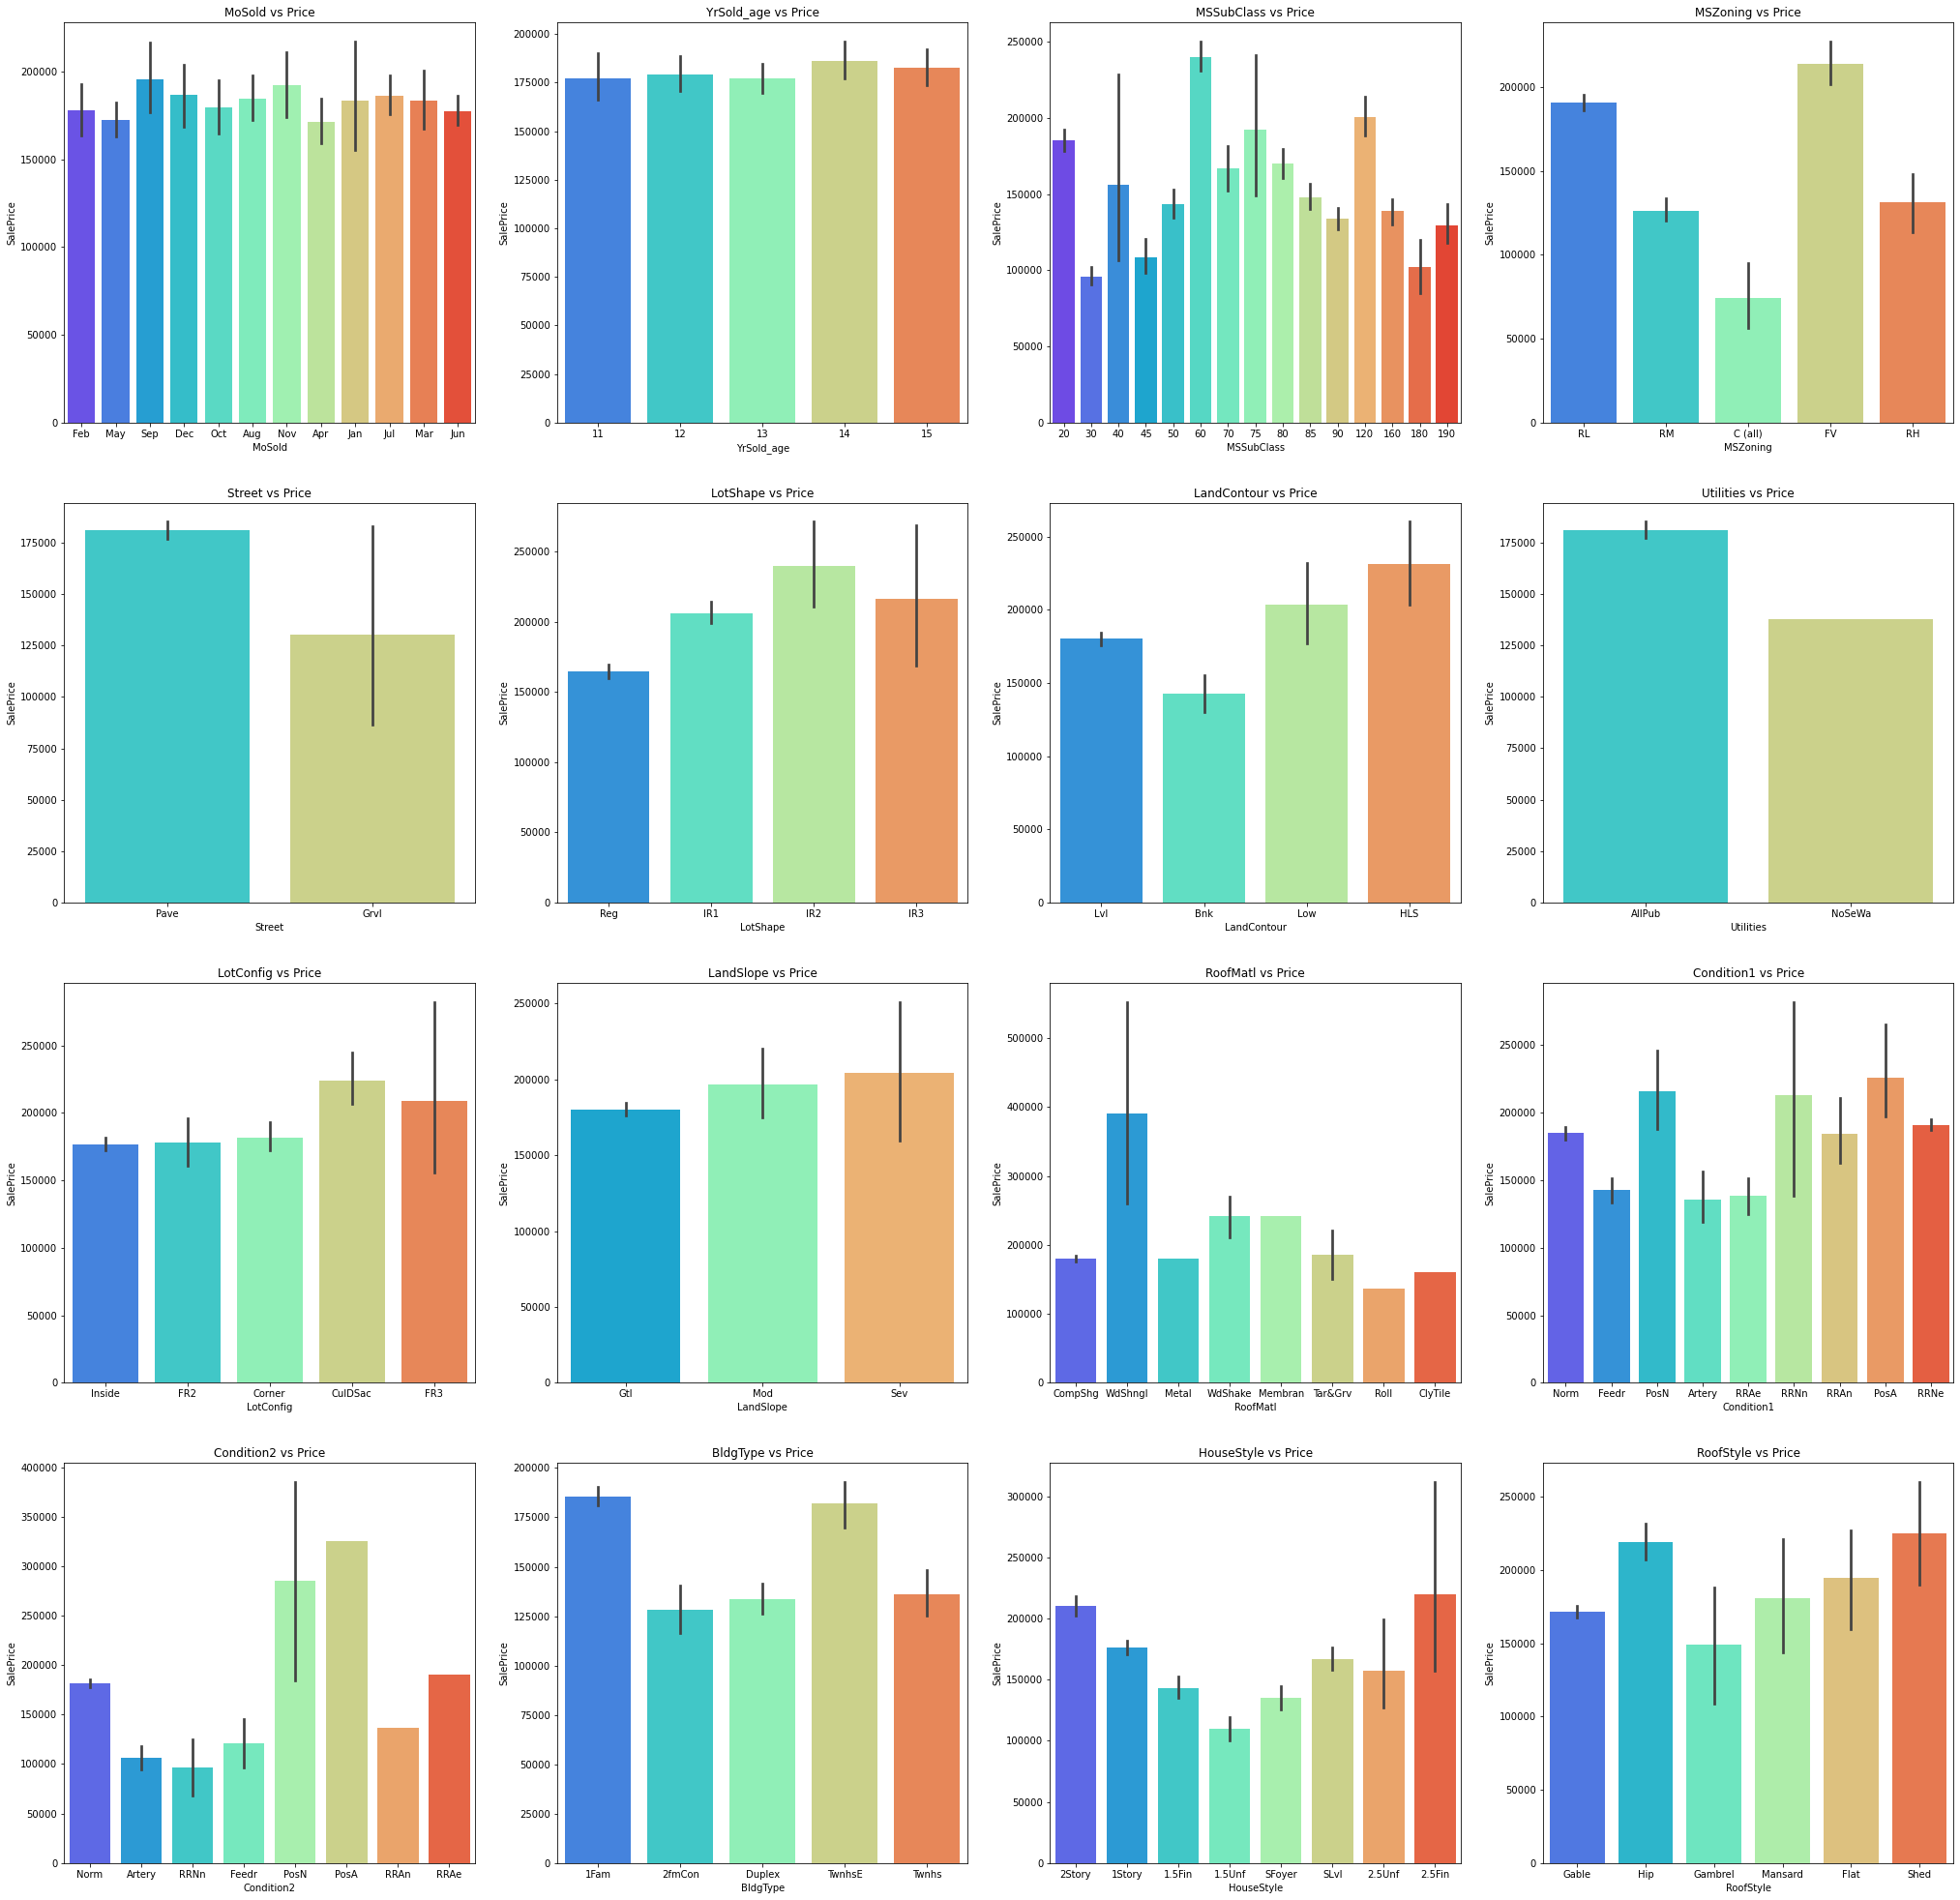

In [22]:
plt.figure(figsize=(35,35))
plt.subplot(4,4,1)
plt.title('MoSold vs Price')
sns.barplot(x=housing_data['MoSold'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,2)
plt.title('YrSold_age vs Price')
sns.barplot(x=housing_data['YrSold_age'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,3)
plt.title('MSSubClass vs Price')
sns.barplot(x=housing_data['MSSubClass'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,4)
plt.title('MSZoning vs Price')
sns.barplot(x=housing_data['MSZoning'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,5)
plt.title('Street vs Price')
sns.barplot(x=housing_data['Street'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,6)
plt.title('LotShape vs Price')
sns.barplot(x=housing_data['LotShape'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,7)
plt.title('LandContour vs Price')
sns.barplot(x=housing_data['LandContour'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,8)
plt.title('Utilities vs Price')
sns.barplot(x=housing_data['Utilities'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,9)
plt.title('LotConfig vs Price')
sns.barplot(x=housing_data['LotConfig'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,10)
plt.title('LandSlope vs Price')
sns.barplot(x=housing_data['LandSlope'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,11)
plt.title('RoofMatl vs Price')
sns.barplot(x=housing_data['RoofMatl'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,12)
plt.title('Condition1 vs Price')
sns.barplot(x=housing_data['Condition1'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,13)
plt.title('Condition2 vs Price')
sns.barplot(x=housing_data['Condition2'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,14)
plt.title('BldgType vs Price')
sns.barplot(x=housing_data['BldgType'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,15)
plt.title('HouseStyle vs Price')
sns.barplot(x=housing_data['HouseStyle'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,16)
plt.title('RoofStyle vs Price')
sns.barplot(x=housing_data['RoofStyle'],y=housing_data['SalePrice'],palette='rainbow')
plt.show()

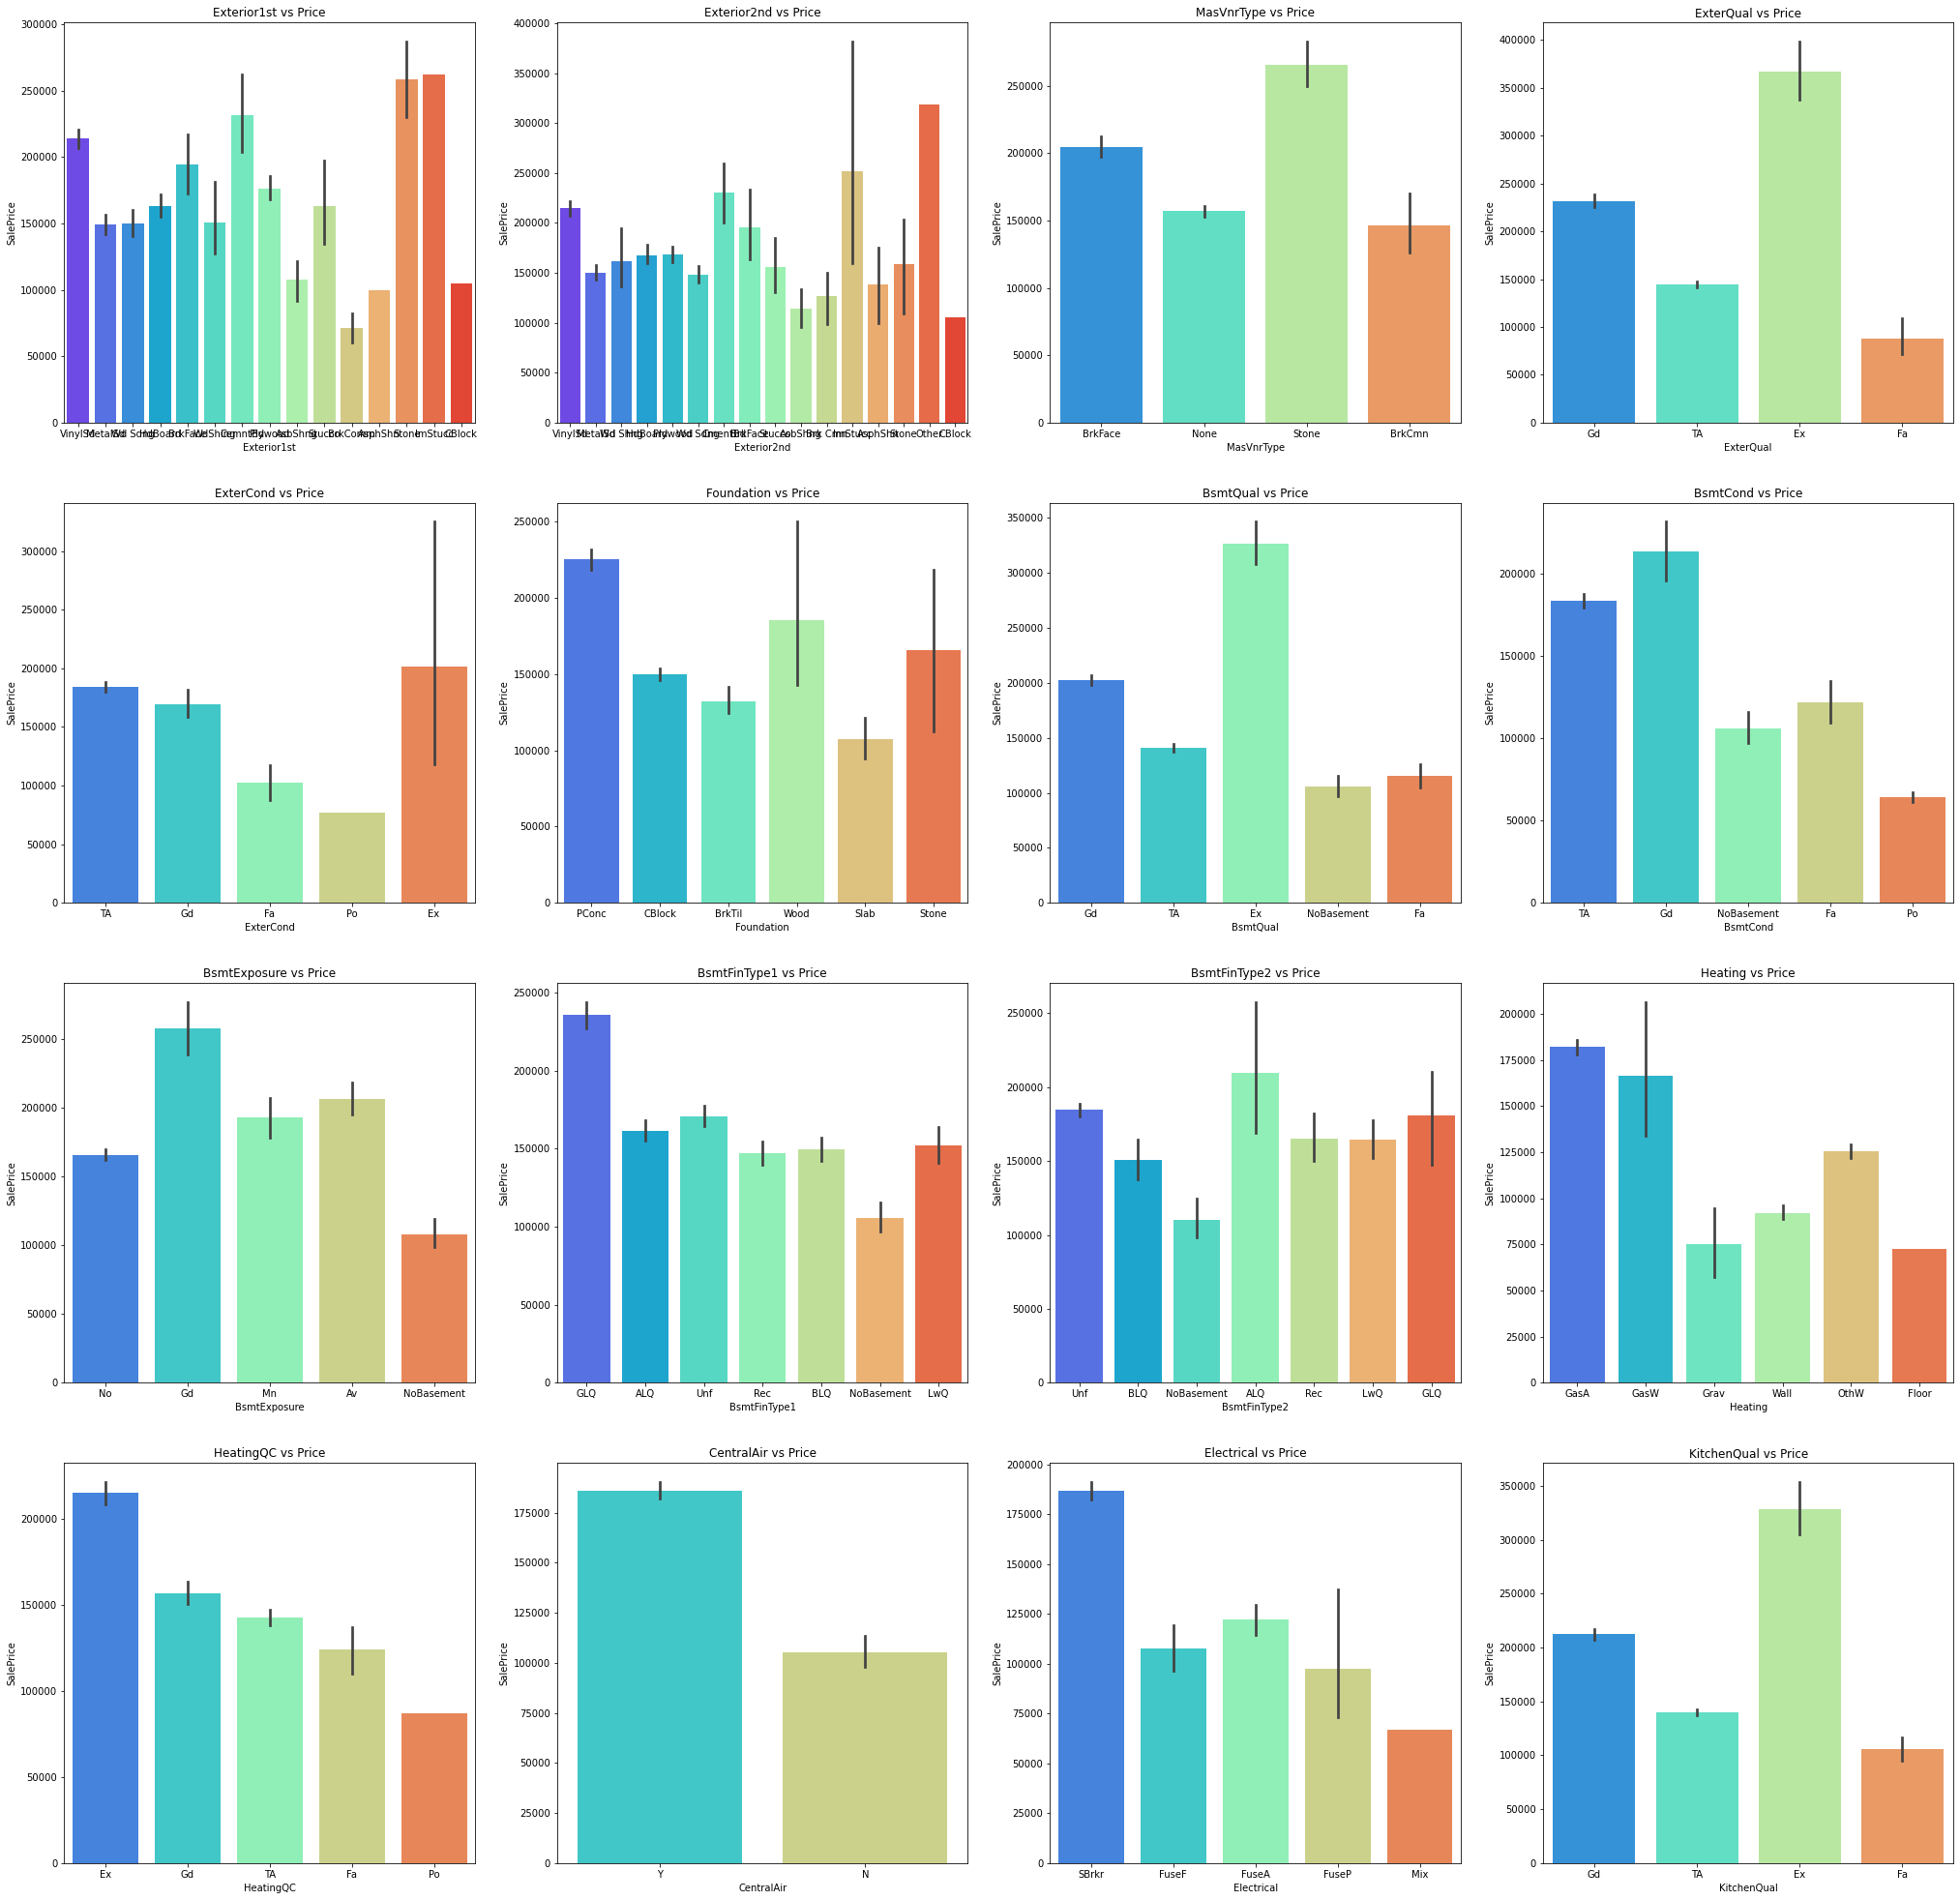

In [23]:

# 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
#        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
#        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical','KitchenQual', 
        
plt.figure(figsize=(35,35))
plt.subplot(4,4,1)
plt.title('Exterior1st vs Price')
sns.barplot(x=housing_data['Exterior1st'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,2)
plt.title('Exterior2nd vs Price')
sns.barplot(x=housing_data['Exterior2nd'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,3)
plt.title('MasVnrType vs Price')
sns.barplot(x=housing_data['MasVnrType'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,4)
plt.title('ExterQual vs Price')
sns.barplot(x=housing_data['ExterQual'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,5)
plt.title('ExterCond vs Price')
sns.barplot(x=housing_data['ExterCond'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,6)
plt.title('Foundation vs Price')
sns.barplot(x=housing_data['Foundation'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,7)
plt.title('BsmtQual vs Price')
sns.barplot(x=housing_data['BsmtQual'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,8)
plt.title('BsmtCond vs Price')
sns.barplot(x=housing_data['BsmtCond'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,9)
plt.title('BsmtExposure vs Price')
sns.barplot(x=housing_data['BsmtExposure'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,10)
plt.title('BsmtFinType1 vs Price')
sns.barplot(x=housing_data['BsmtFinType1'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,11)
plt.title('BsmtFinType2 vs Price')
sns.barplot(x=housing_data['BsmtFinType2'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,12)
plt.title('Heating vs Price')
sns.barplot(x=housing_data['Heating'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,13)
plt.title('HeatingQC vs Price')
sns.barplot(x=housing_data['HeatingQC'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,14)
plt.title('CentralAir vs Price')
sns.barplot(x=housing_data['CentralAir'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,15)
plt.title('Electrical vs Price')
sns.barplot(x=housing_data['Electrical'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(4,4,16)
plt.title('KitchenQual vs Price')
sns.barplot(x=housing_data['KitchenQual'],y=housing_data['SalePrice'],palette='rainbow')
plt.show()

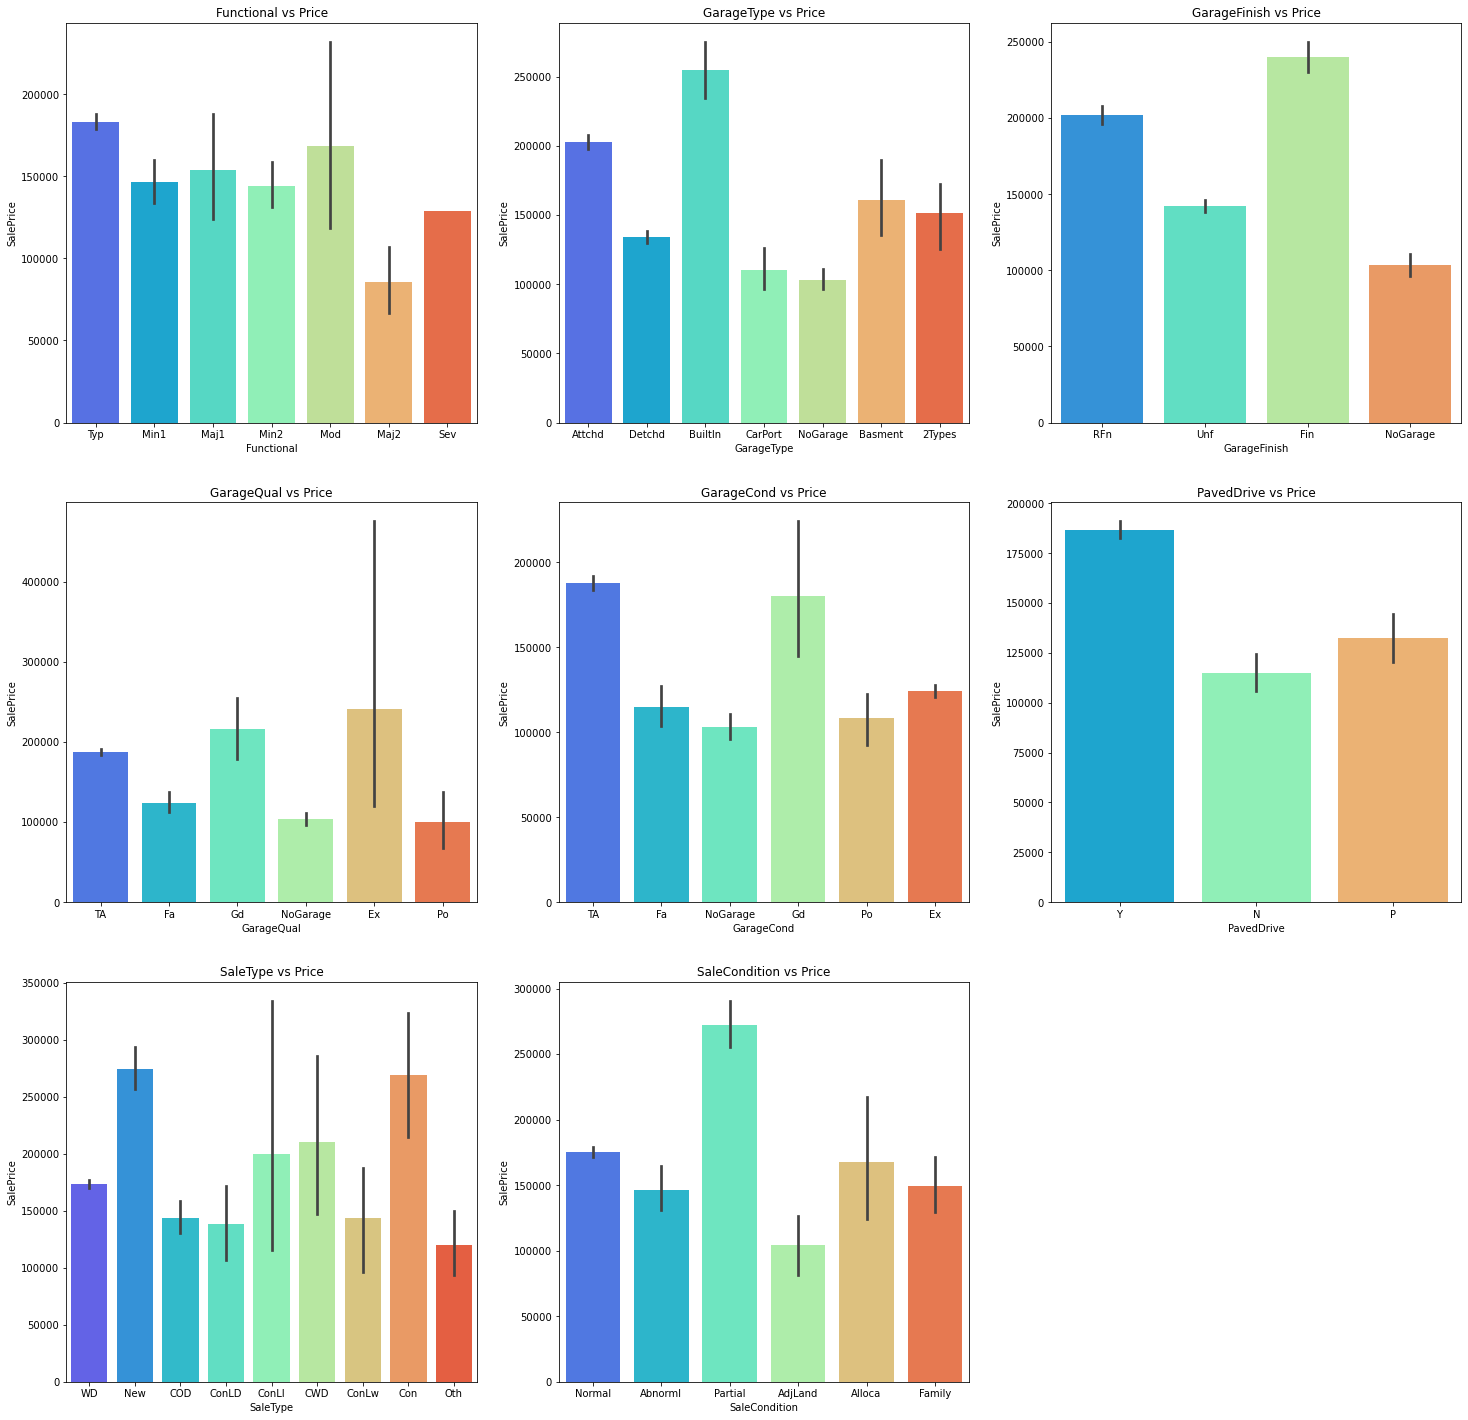

In [24]:
# 'Functional', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'

plt.figure(figsize=(25,25))
plt.subplot(3,3,1)
plt.title('Functional vs Price')
sns.barplot(x=housing_data['Functional'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(3,3,2)
plt.title('GarageType vs Price')
sns.barplot(x=housing_data['GarageType'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(3,3,3)
plt.title('GarageFinish vs Price')
sns.barplot(x=housing_data['GarageFinish'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(3,3,4)
plt.title('GarageQual vs Price')
sns.barplot(x=housing_data['GarageQual'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(3,3,5)
plt.title('GarageCond vs Price')
sns.barplot(x=housing_data['GarageCond'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(3,3,6)
plt.title('PavedDrive vs Price')
sns.barplot(x=housing_data['PavedDrive'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(3,3,7)
plt.title('SaleType vs Price')
sns.barplot(x=housing_data['SaleType'],y=housing_data['SalePrice'],palette='rainbow')
plt.subplot(3,3,8)
plt.title('SaleCondition vs Price')
sns.barplot(x=housing_data['SaleCondition'],y=housing_data['SalePrice'],palette='rainbow')
plt.show()

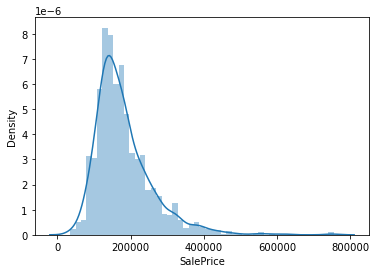

In [25]:
sns.distplot(housing_data['SalePrice'])
plt.show()

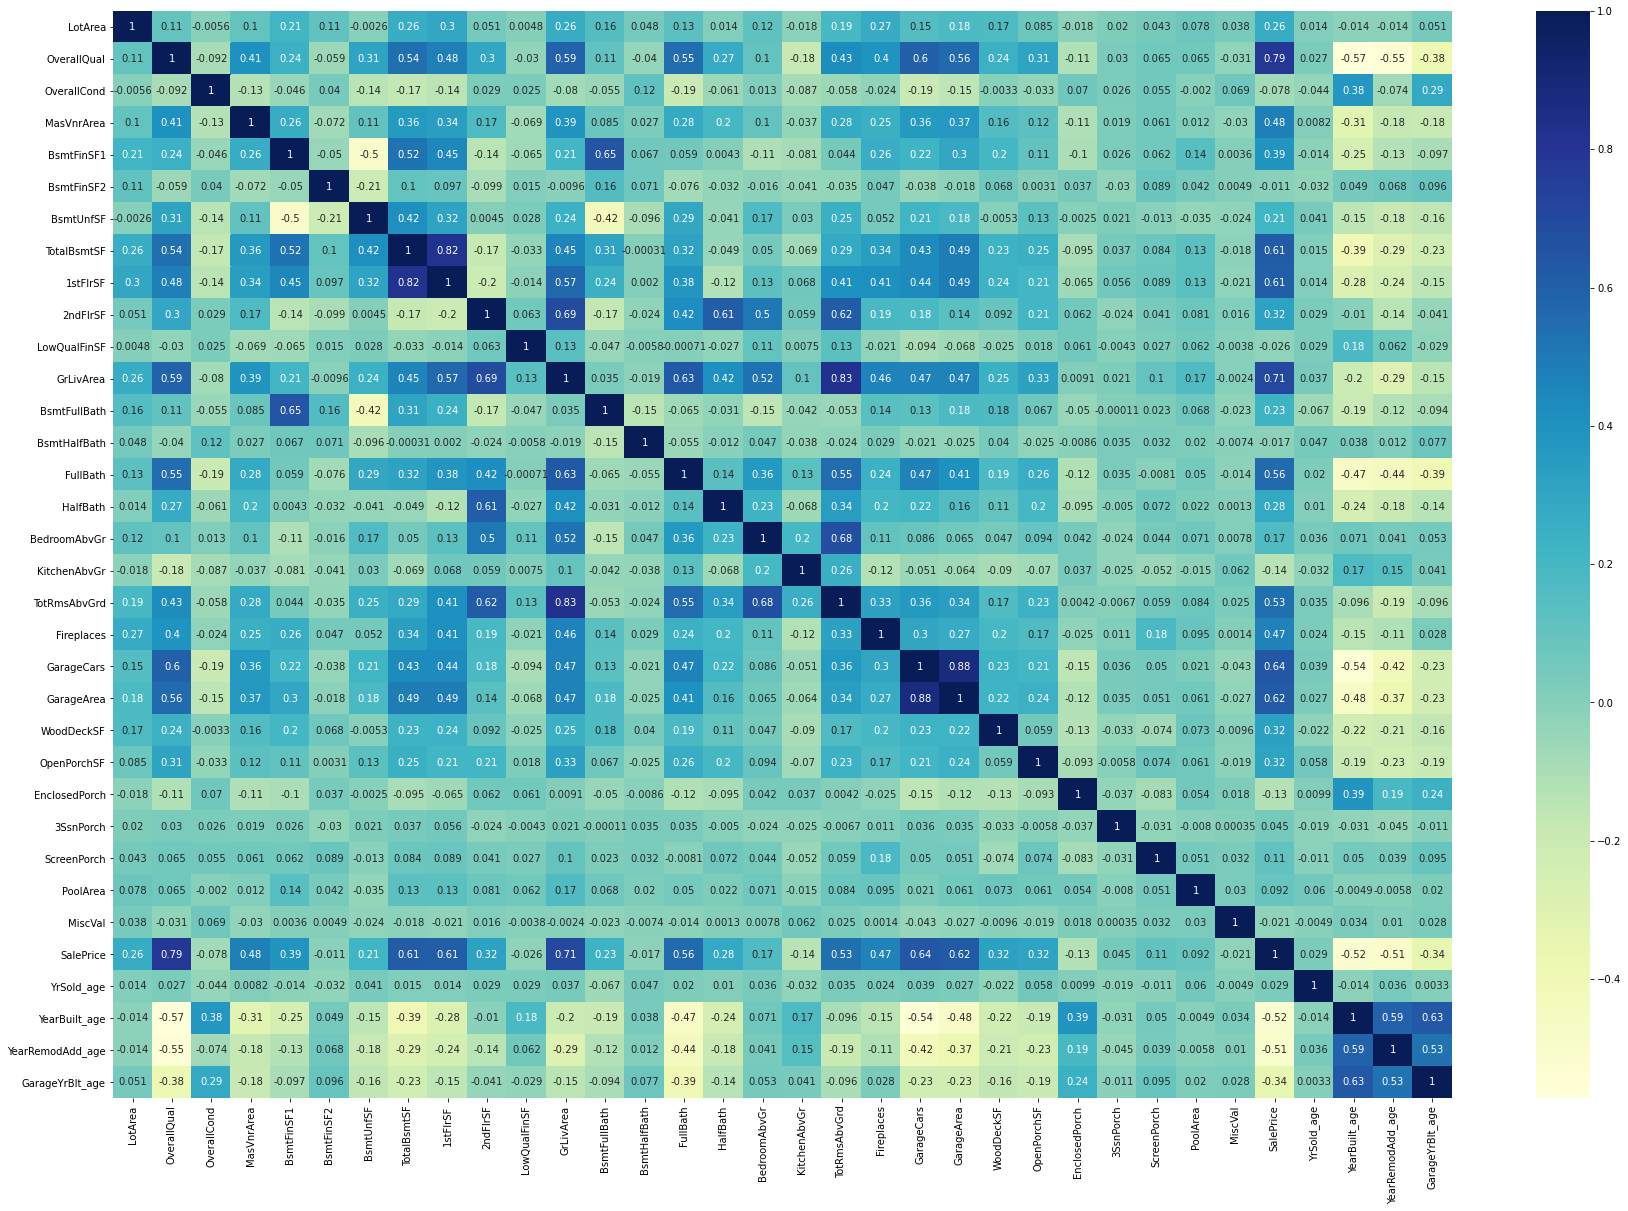

In [26]:
##### correlation matrix
cor = housing_data.corr()

# Plotting correlations on a heatmap
plt.figure(figsize=(30,20))

#heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


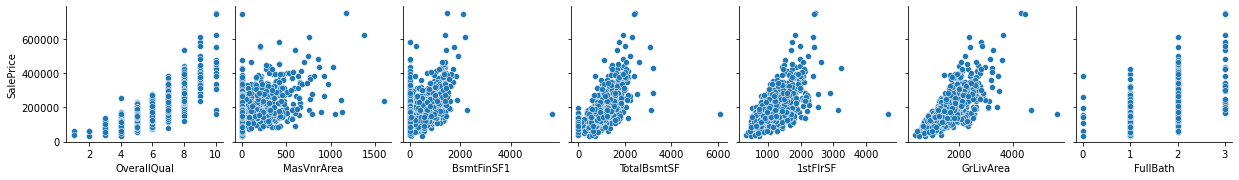

In [27]:
sns.pairplot(housing_data, x_vars=['OverallQual', 'MasVnrArea', 'BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath'], 
             y_vars='SalePrice', kind='scatter')
plt.show()

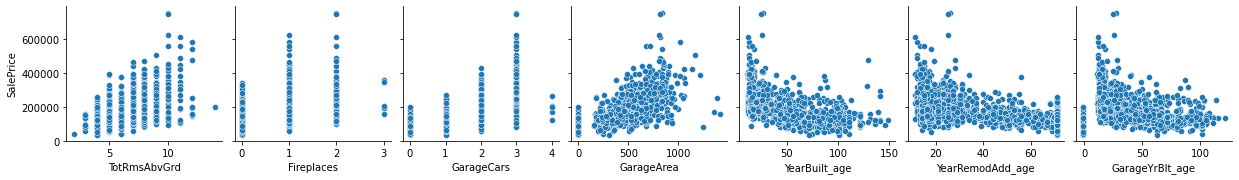

In [28]:
sns.pairplot(housing_data, x_vars=['TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','YearBuilt_age', 'YearRemodAdd_age','GarageYrBlt_age'], 
             y_vars='SalePrice', kind='scatter')
plt.show()

### Data preperation

In [29]:
# mapping data 
housing_data['CentralAir'] = housing_data['CentralAir'].map({'Y':1, 'N':0})
housing_data['Utilities'] = housing_data['Utilities'].map({'AllPub':1, 'NoSeWa':0})
housing_data['Street'] = housing_data['Street'].map({'Pave':1, 'Grvl':0})

In [30]:
category_columns = housing_data.select_dtypes(include=['object'])
category_columns.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Gd,Typ,Attchd,RFn,TA,TA,Y,Feb,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,TA,Typ,Attchd,RFn,TA,TA,Y,May,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Gd,Typ,Attchd,RFn,TA,TA,Y,Sep,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Gd,Typ,Detchd,Unf,TA,TA,Y,Feb,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Gd,Typ,Attchd,RFn,TA,TA,Y,Dec,WD,Normal


In [31]:
### Creating dummy variables
Dummy_variables = pd.get_dummies(category_columns, drop_first=True)
Dummy_variables.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
# dropping categorical columns
housing_data = housing_data.drop(list(category_columns.columns), axis=1)

In [33]:
housing_data.head()

,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YrSold_age,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age
0,8450,1,1,7,5,196.0,706,0,150,856,...,0,0,0,0,0,208500,13,18,18,18.0
1,9600,1,1,6,8,0.0,978,0,284,1262,...,0,0,0,0,0,181500,14,45,45,45.0
2,11250,1,1,7,5,162.0,486,0,434,920,...,0,0,0,0,0,223500,13,20,19,20.0
3,9550,1,1,7,5,0.0,216,0,540,756,...,272,0,0,0,0,140000,15,106,51,23.0
4,14260,1,1,8,5,350.0,655,0,490,1145,...,0,0,0,0,0,250000,13,21,21,21.0


In [34]:
# Merging the dummy variables to housing data
housing_data = pd.concat([housing_data,Dummy_variables], axis=1)

In [35]:
housing_data.head()

,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,1,1,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,9600,1,1,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,11250,1,1,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,9550,1,1,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,1,1,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


#### Outliers treatment

Calculating the percentage of outliers and removing some amount of outliers

In [36]:
def percentage_outlier(x):
    iqr = housing_data[x].quantile(0.75)-housing_data[x].quantile(0.25)
    HL = housing_data[x].quantile(0.75)+iqr*1.5
    LL = housing_data[x].quantile(0.25)-iqr*1.5
    per_outlier = ((housing_data[x]<LL).sum()+(housing_data[x]>HL).sum())/len(housing_data[x])*100
    per_outlier = round(per_outlier,2)
    return(per_outlier)

for i in numeric_columns:
    print('Percentage of outlier in '+i+": ", percentage_outlier(i))

Percentage of outlier in LotArea:  4.73
Percentage of outlier in OverallQual:  0.14
Percentage of outlier in OverallCond:  8.56
Percentage of outlier in MasVnrArea:  6.71
Percentage of outlier in BsmtFinSF1:  0.48
Percentage of outlier in BsmtFinSF2:  11.44
Percentage of outlier in BsmtUnfSF:  1.99
Percentage of outlier in TotalBsmtSF:  4.18
Percentage of outlier in 1stFlrSF:  1.37
Percentage of outlier in 2ndFlrSF:  0.14
Percentage of outlier in LowQualFinSF:  1.78
Percentage of outlier in GrLivArea:  2.12
Percentage of outlier in BsmtFullBath:  0.07
Percentage of outlier in BsmtHalfBath:  5.62
Percentage of outlier in FullBath:  0.0
Percentage of outlier in HalfBath:  0.0
Percentage of outlier in BedroomAbvGr:  2.4
Percentage of outlier in KitchenAbvGr:  4.66
Percentage of outlier in TotRmsAbvGrd:  2.05
Percentage of outlier in Fireplaces:  0.34
Percentage of outlier in GarageCars:  0.34
Percentage of outlier in GarageArea:  1.44
Percentage of outlier in WoodDeckSF:  2.19
Percentage 

In [37]:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.1)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing_data = drop_outliers(housing_data)

In [38]:
housing_data.shape

(1348, 264)

### Splitting the Data into Training and Testing Sets

In [39]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
# Scaling the features before Regularising the model
scaler = MinMaxScaler()

df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

In [41]:
# Spliting the dependent and independent variable
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [42]:
len(X_train.columns)

263

#### Using RFE to get the important features from model because of the high number of variables present in the data

In [43]:
# Running RFE with the output number of the variable equal to 80
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 80)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotArea', True, 1),
 ('Street', True, 1),
 ('Utilities', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 37),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 161),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 35),
 ('BsmtHalfBath', False, 105),
 ('FullBath', False, 114),
 ('HalfBath', False, 115),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 111),
 ('GarageCars', False, 11),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 23),
 ('OpenPorchSF', False, 56),
 ('EnclosedPorch', False, 57),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 38),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('YrSold_age', False, 151),
 ('YearBuilt_age', True, 1),
 ('YearRemodAdd_age', False, 65),
 ('GarageYrBlt_age', False, 81),
 ('MSSubClass_30',

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'Street', 'Utilities', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageArea', '3SsnPorch', 'PoolArea', 'MiscVal',
       'YearBuilt_age', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_RRAe', 'Condition1_RRNe',
       'Condition2_PosA', 'Condition2_RRAe', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterQual_Gd',
      

In [46]:
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=183)

In [47]:
# Creating X_train, X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

### Model Building and Evaluation

#### Linear Regression

Let's now try predicting Sale prices, a dataset using linear regression. Using only the selected features from RFE.

In [48]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [49]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

211929259722.22092
[ 7.17170284e-02  7.04688189e-02 -2.05401973e+11  1.13464316e-01
  9.62859618e-02 -2.51445554e+10 -1.38316400e+10 -3.06373672e+10
  4.55362633e+10  2.82227502e+10  1.77294264e+10  5.02236225e+09
 -3.08070725e+10 -5.24482727e-02 -1.24422073e-01  7.53822327e-02
  7.51581192e-02 -1.25788375e+09 -3.31265002e+09  4.23383746e+08
 -1.07433319e-01 -2.48274803e-02  7.71713257e-02  1.49864581e+10
  4.69551086e-02  4.71000671e-02  3.76930237e-02  8.82778168e-02
 -4.07028198e-02  2.05341637e+08  5.32230007e+07  1.32715196e+07
 -1.49864581e+10  4.97221947e-02 -9.62014198e-02 -7.98602104e-02
  1.16240697e+07 -6.52728710e+09  2.27630546e+06  4.09981282e+06
 -6.52728710e+09 -6.52728710e+09 -6.52728710e+09 -6.52728710e+09
 -3.40546250e+05  1.09886898e+05 -3.94202498e+09  3.32660675e-02
  3.94202498e+09 -7.20398300e+02 -5.83496094e-02 -6.88781738e-02
 -8.08396339e-02  4.46955638e+09 -3.49649600e+10  3.54385376e-02
  1.52477018e+10  1.52477018e+10 -1.52295207e+10 -4.19225693e-02
 -4.87

In [50]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9208809088917145
-5.153017633512784e+21
1.3255943892007864
4.288638166787539e+22
0.0014057204551439942
1.0589230041450712e+20


#### Ridge and Lasso Regression

Let's now try predicting Sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.


#### Ridge Regression

Using only the selected features from RFE for Ridge regression.

In [51]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

folds = KFold(n_splits=10,shuffle=True,random_state=42)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [52]:
Ridge_best_alpha = model_cv.best_params_['alpha']
Ridge_best_alpha

0.9

In [53]:
print(model_cv.best_score_)

0.9052952368716038


In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results

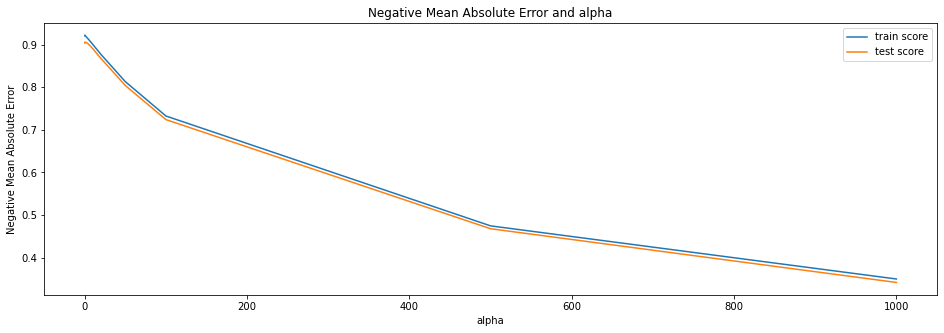

In [55]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [56]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised

ridge = Ridge(alpha=Ridge_best_alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.07060389  0.0300374   0.          0.11760284  0.08774891  0.09321181
  0.02412636  0.0516415   0.09354383  0.10567143  0.08827772 -0.03162253
  0.14245534 -0.03987939 -0.09483213  0.07006485  0.07560505  0.
  0.          0.         -0.10346893 -0.00202993  0.0349011  -0.01724737
  0.04778099  0.04875878  0.03984489  0.08218523 -0.0377593   0.
  0.          0.         -0.01724737  0.02511184 -0.04701261 -0.0467697
  0.          0.01325923  0.          0.          0.01457654 -0.016118
 -0.00346273 -0.00825504  0.          0.         -0.02606073  0.01747945
 -0.02606073  0.         -0.04988677 -0.06047414 -0.04144294  0.01523885
  0.01523885  0.03765906  0.01523885  0.01523885  0.00892195 -0.04502627
 -0.05096057 -0.05402977  0.03116176 -0.04063641  0.05146541  0.00070656
  0.00070656 -0.00860311 -0.00313922  0.00070656  0.00892195 -0.00876624
 -0.00649676 -0.00105164  0.00070656 -0.0075355   0.00349729  0.05942842
  0.05592369  0.04010275]


In [57]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9195402273776142
0.9053960314410782
1.3480567287941998
0.7873487326197675
0.001429540539548462
0.0019440709447401665


#### Lasso Regression

Performing regression with the whole X_train data as Lasso has inbuilt feature selection.

In [58]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
# Printing the best hyperparameter alpha

Lasso_best_alpha = model_cv.best_params_['alpha']
Lasso_best_alpha

0.0001

In [60]:
print(model_cv.best_score_)

0.9087318399815004


In [61]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results

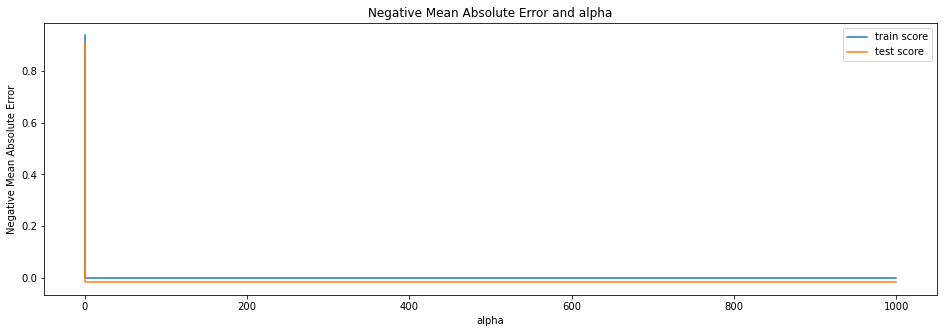

In [62]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
# Fitting Lasso model for best alpha and printing coefficients which have been penalised

lasso = Lasso(alpha=Lasso_best_alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [64]:
lasso.coef_

array([ 4.20275456e-02,  0.00000000e+00,  0.00000000e+00,  1.02311663e-01,
        7.81244744e-02,  1.78094311e-02,  3.82324921e-02,  0.00000000e+00,
        0.00000000e+00,  1.33056584e-01,  3.34811494e-03,  0.00000000e+00,
        0.00000000e+00, -2.35105811e-02,  2.75988620e-01,  8.77760539e-03,
       -3.81823889e-03,  9.03693663e-03,  9.42430499e-03, -1.82283682e-02,
       -6.87289815e-02,  2.06265241e-02,  1.64387848e-02,  1.85938666e-02,
        4.06920811e-02,  1.96286177e-02,  1.36445479e-02,  5.63307199e-03,
        0.00000000e+00,  1.46672082e-02,  0.00000000e+00,  0.00000000e+00,
        2.29613398e-04, -7.20702818e-02, -1.15641039e-02, -0.00000000e+00,
        1.49866088e-03,  0.00000000e+00,  1.52414485e-03,  0.00000000e+00,
        1.54475231e-03,  0.00000000e+00, -0.00000000e+00, -1.28410724e-03,
       -0.00000000e+00, -1.80674730e-02, -1.64121445e-02, -1.61243254e-02,
       -0.00000000e+00, -6.73786109e-03,  1.60793972e-02,  0.00000000e+00,
        8.75511469e-03, -

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9369222201039905
0.9198012409226706
1.05683154270507
0.6674602797226786
0.001120712134363807
0.0016480500733893298


In [66]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.208809e-01,0.919540,0.936922
1,R2 Score (Test),-5.153018e+21,0.905396,0.919801
2,RSS (Train),1.325594e+00,1.348057,1.056832
3,RSS (Test),4.288638e+22,0.787349,0.667460
4,MSE (Train),3.749294e-02,0.037809,0.033477
5,MSE (Test),1.029040e+10,0.044092,0.040596


Considered below alpha values for Ridge and Lasso Regressions:

Ridge regression: 0.9

Lasso regression: 0.0001

### Double the value of alpha to check the changes in ridge and lasso regression

In [67]:
# Fitting Lasso model for best alpha*2 and printing coefficients which have been penalised

alpha = Lasso_best_alpha*2

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [68]:
# lasso2.coef_

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9302596920990627
0.9179795779258623
1.1684583273092797
0.6826212087370251
0.0012390862431699678
0.0016854844660173461


In [70]:
#Fitting Ridge model for best alpha and printing coefficients which have been penalised

alpha = Ridge_best_alpha*2

ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe, y_train)
# print(ridge2.coef_)

Ridge(alpha=1.8)

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9178444683972805
0.9059325202760148
1.3764681849709475
0.7828837634362718
0.0014596693371908246
0.001933046329472276


In [72]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.917844,0.930260
1,R2 Score (Test),0.905933,0.917980
2,RSS (Train),1.376468,1.168458
3,RSS (Test),0.782884,0.682621
4,MSE (Train),0.038206,0.035201
5,MSE (Test),0.043966,0.041055


We can observe that there is no much difference in the metric values before and after doubling the alpha value.

### Important predictor variables in Lasso and Ridge regression

In [83]:
#important predictor variables before increase in alpha value for Lasso regression
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas = betas.sort_values(by='Lasso', ascending=False)
betas.head(10)

,Lasso
GrLivArea,0.275989
TotalBsmtSF,0.133057
OverallQual,0.102312
Neighborhood_StoneBr,0.089093
OverallCond,0.078124
Neighborhood_NoRidge,0.045482
LotArea,0.042028
GarageArea,0.040692
Neighborhood_NridgHt,0.039481
Functional_Typ,0.038790


In [85]:
#important predictor variables after increase in alpha value for Lasso regression
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas = betas.sort_values(by='Lasso2', ascending=False)
betas.head(10)

,Lasso2
GrLivArea,0.266627
TotalBsmtSF,0.137109
OverallQual,0.113891
Neighborhood_StoneBr,0.075783
OverallCond,0.071262
GarageArea,0.051804
Neighborhood_NoRidge,0.043492
BsmtFinSF1,0.041086
Neighborhood_NridgHt,0.039376
LotArea,0.038222


In [75]:
#important predictor variables before increase in alpha value for Ridge regression
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge'] = ridge.coef_
pd.set_option('display.max_rows', None)
betas = betas.sort_values(by='Ridge', ascending=False)
betas.head(10)

,Ridge
GrLivArea,0.142455
OverallQual,0.117603
1stFlrSF,0.105671
TotalBsmtSF,0.093544
BsmtFinSF1,0.093212
2ndFlrSF,0.088278
OverallCond,0.087749
Neighborhood_StoneBr,0.082185
GarageArea,0.075605
LotArea,0.070604


In [87]:
#important predictor variables after increase in alpha value for Ridge regression
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge2'] = ridge2.coef_
pd.set_option('display.max_rows', None)
betas = betas.sort_values(by='Ridge2', ascending=False)
betas.head(10)

,Ridge2
GrLivArea,0.136991
OverallQual,0.118310
1stFlrSF,0.102133
BsmtFinSF1,0.091669
TotalBsmtSF,0.090356
2ndFlrSF,0.083945
OverallCond,0.081297
Neighborhood_StoneBr,0.077463
GarageArea,0.075975
LotArea,0.068717


In [88]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge2'] = ridge2.coef_
pd.set_option('display.max_rows', None)
betas = betas.sort_values(by='Ridge2', ascending=True)
betas.head(10)

,Ridge2
YearBuilt_age,-0.099471
KitchenAbvGr,-0.076371
ExterQual_TA,-0.057235
KitchenQual_TA,-0.056396
KitchenQual_Gd,-0.051647
KitchenQual_Fa,-0.045956
ExterQual_Gd,-0.045466
HouseStyle_2.5Unf,-0.035894
Condition1_RRAe,-0.034935
HouseStyle_2.5Fin,-0.032028


Below are the important predictor variables after the change is implemented: -

Lasso:
1.	GrLivArea 
2.	TotalBsmtSF
3.	OverallQual 
4.	Neighborhood_StoneBr	
5.	OverallCond
6.	GarageArea

Ridge:
1.	GrLivArea 
2.	OverallQual
3.	1stFlrSF
4.	YearBuilt_age
5.	BsmtFinSF1	
6.	TotalBsmtSF



### Creating another model excluding the five most important predictor variables.

#### Lasso Regression

In [89]:
X_train_2 = X_train.drop(['GrLivArea','OverallQual','Neighborhood_StoneBr','OverallCond','TotalBsmtSF'],axis=1)
X_test_2 = X_test.drop(['GrLivArea','OverallQual','Neighborhood_StoneBr','OverallCond','TotalBsmtSF'],axis=1)

In [90]:
alpha = Lasso_best_alpha

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train_2, y_train) 

Lasso(alpha=0.0001)

In [91]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso3.predict(X_train_2)
y_pred_test = lasso3.predict(X_test_2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9256849085498059
0.9066558253772244
1.2451061669110133
0.7768640016502728
0.0013203670911039378
0.0019181827201241303


In [92]:
#important predictor variables after increase in alpha value for Lasso regression
betas = pd.DataFrame(index=X_train_2.columns)
betas.rows = X_train_2.columns
betas['Lasso3'] = lasso3.coef_
pd.set_option('display.max_rows', None)
betas = betas.sort_values(by='Lasso3', ascending=False)
betas.head(10)

,Lasso3
1stFlrSF,0.280927
2ndFlrSF,0.169975
BsmtFinSF1,0.117001
BsmtUnfSF,0.095503
Functional_Typ,0.049696
GarageArea,0.049012
SaleType_CWD,0.038608
SaleCondition_Partial,0.036297
BsmtExposure_Gd,0.032734
LotArea,0.029099


In [93]:
betas = betas.sort_values(by='Lasso3', ascending=True)
betas.head(10)

,Lasso3
KitchenAbvGr,-0.093737
ExterQual_TA,-0.056892
YearBuilt_age,-0.048433
ExterQual_Gd,-0.043314
ExterQual_Fa,-0.042770
KitchenQual_Gd,-0.040398
KitchenQual_TA,-0.039600
BsmtQual_Gd,-0.034391
BsmtQual_TA,-0.030966
Neighborhood_Mitchel,-0.028846


After creating another model excluding the five most important predictor variables (GrLivArea, OverallQual, Neighborhood_StoneBr, TotalBsmtSF, OverallCond) from Lasso regression, below are the five important features. 
1.	1stFlrSF
2.	2ndFlrSF
3.	BsmtFinSF1
4.	BsmtUnfSF
5.	KitchenAbvGr
